# Appendix 3 Normalization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Normalization can mean a variety of slightly similar operations, not all of which can be discussed here. The aim of normalizing data is change its scale, so that it becomes directly comparable to other data. 

Lets present here two classes of 7 students each, graded under different grading systems. Class A is graded from 0 to 10. Class be from 0 to 20. Which class has the highest grades?

In [136]:
grades_A = np.array([9, 7, 9, 8.5, 9, 8, 5.5])
grades_B = np.array([16, 17.5, 20, 15, 14, 15, 17.5])

Putting these two grade distributions side by side, with a mark around the median, is not very instructive. Of course students in class B score "higher", but only in because they work on a larger grade-scale.

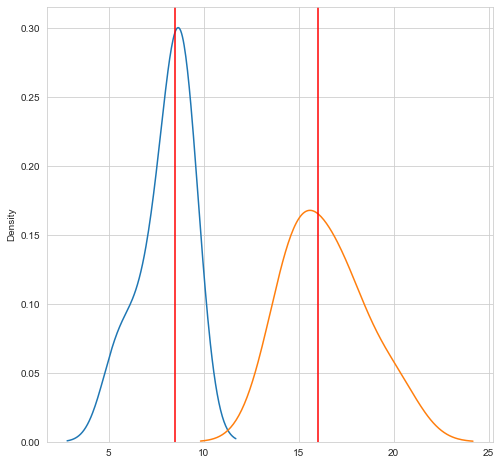

In [137]:
plt.figure(figsize=(8,8))
sns.kdeplot(grades_A)
plt.axvline(x=np.median(grades_A), color="red")
sns.kdeplot(grades_B)
plt.axvline(x= np.median(grades_B), color="red")


One thing that can be done is to normalize the grades by diving them by the sum of their absolute values. This is one of many normalization options and is called an l1 norm.

$$ norm_1 = \frac{x}{\sum |x|} $$

In [138]:
A_1norm = np.sum(np.abs(grades_A))
B_1norm = np.sum(np.abs(grades_B))
grades_A_1norm = grades_A/A_1norm
grades_B_1norm = grades_B/B_1norm

With this operation the grades are put in the same scale, and can now be more directly compared with the result that class A actually does have higher median grades.

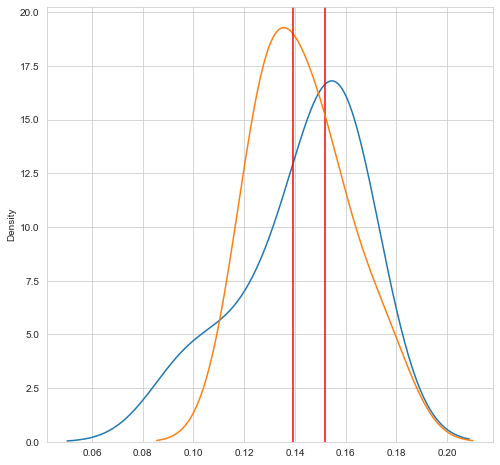

In [141]:
plt.figure(figsize=(8,8))
sns.kdeplot(grades_A_1norm)
plt.axvline(x=np.median(grades_A_1norm), color="red")
sns.kdeplot(grades_B_1norm)
plt.axvline(x=np.median(grades_B_1norm), color="red")


Another option is the l2 norm, which is the square root of the sum of the elements of your array squared.

$$ norm_2 = \frac{x}{\sqrt{\sum x^2}} $$

In [142]:
A_2norm = np.linalg.norm(grades_A)
B_2norm = np.linalg.norm(grades_B)
grades_A_2norm = grades_A/A_2norm
grades_B_2norm = grades_B/B_2norm


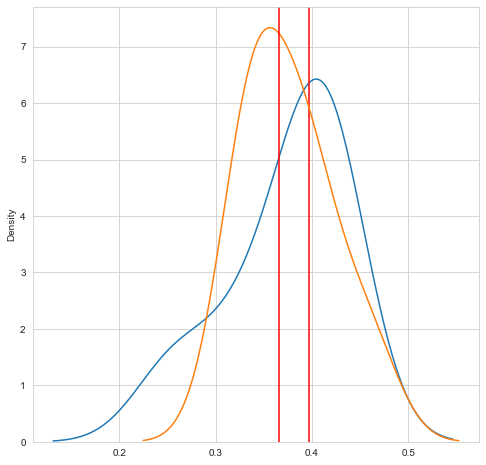

In [144]:
plt.figure(figsize=(8,8))
sns.kdeplot(grades_A_2norm)
plt.axvline(x=np.median(grades_A_2norm), color="red")
sns.kdeplot(grades_B_2norm)
plt.axvline(x=np.median(grades_B_2norm), color="red")


You will note that the normalization leads to virtually identical results in the graph. l1 and l2 norms can diverge, as l2 will give more weight to bigger numbers.

That the graphs are nearly identical is the point. This is not so for the actual numbers, which can be quite different. However the numbers as such are meaningless at this point. It is only their relationship that is preserved by their conversion into a different scale.

In [145]:
pd.DataFrame({"1norm A": grades_A_1norm, "2norm A": grades_A_2norm, "1norm B": grades_B_1norm, "2norm B": grades_B_2norm})

,1norm A,2norm A,1norm B,2norm B
0,0.1607,0.4203,0.1391,0.3657
1,0.1250,0.3269,0.1522,0.4000
2,0.1607,0.4203,0.1739,0.4571
3,0.1518,0.3970,0.1304,0.3428
4,0.1607,0.4203,0.1217,0.3200
5,0.1429,0.3736,0.1304,0.3428
6,0.0982,0.2569,0.1522,0.4000


Of course you can turn back the process and the original grade.

In [146]:
grades_A_1norm*A_1norm

array([9. , 7. , 9. , 8.5, 9. , 8. , 5.5])